In [38]:
predictions_path = '../predictions/sts-dev-output.csv'
ground_truth_path = '../data/sts-dev.csv'
output_path = './sts.png'

In [39]:
#id	sentence1	sentence2	similarity
p_id, p_similarity = [], []
with open(predictions_path) as f:
    next(f)
    for line in f:
        id, sim = line.strip().split(' , ')
        p_similarity.append(float(sim))
        p_id.append(id)

g_id, g_similarity ,s1 , s2= [], [], [], []

with open(ground_truth_path) as f:
    next(f)
    for line in f:
        _, id, sen1, sen2, sim = line.strip().split('\t')
        g_similarity.append(float(sim))
        g_id.append(id)
        s1.append(sen1)
        s2.append(sen2)

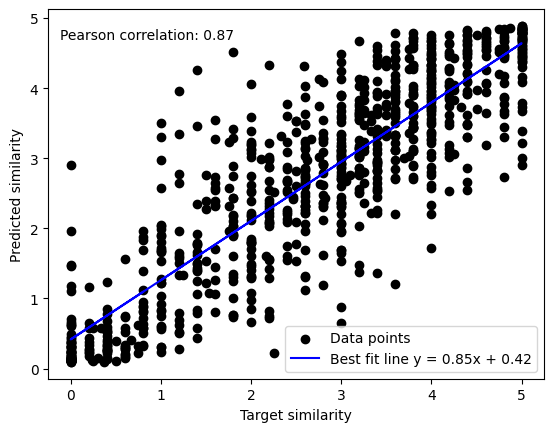

In [40]:
#Scatter plot of predicted and target similarities for STS, line of best fit, and correlation coefficient
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

g_similarity = np.array(g_similarity)
p_similarity = np.array(p_similarity)
g_similarity_reshaped = g_similarity.reshape(-1, 1)
model = LinearRegression()
model.fit(g_similarity_reshaped, p_similarity)
p_pred = model.predict(g_similarity_reshaped)

pearsonr_coef = pearsonr(g_similarity, p_similarity)

plt.scatter(g_similarity, p_similarity, color='black', label='Data points')
plt.plot(g_similarity, p_pred, color='blue', label='Best fit line y = %.2fx + %.2f' % (model.coef_[0], model.intercept_))
plt.text(0.2, 0.93, 'Pearson correlation: {:.2f}'.format(pearsonr_coef[0]), horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.legend()
plt.xlabel('Target similarity')
plt.ylabel('Predicted similarity')
plt.savefig(output_path)




In [50]:
for i in range(len(p_id)):
    if abs(p_similarity[i] - g_similarity[i]) > 2.5:
        print("{:.2f}".format(p_similarity[i]) + " / " + "{:.2f}".format(g_similarity[i]) + "\n" + s1[i] + "\n" + s2[i] + "\n")

2.90 / 0.00
Work into it slowly.
It seems to work.

3.95 / 1.20
Use of force in defense of person.-A
Use of force by aggressor.

4.25 / 1.40
Syrian fighter pilot defects to Jordan
Syrian PM defects to Jordan

4.52 / 1.80
Indian stocks open lower
Indian stocks close lower

3.50 / 1.00
World stocks rise on hopes Fed to keep stimulus
Fed expected to maintain stimulus

